In [1]:
#installing all the required packages
!pip install numpy==1.19.5
!pip install matplotlib==3.2.2
!pip install pandas==1.3.0
!pip install imblearn==0.0
!pip install scikit_learn==1.0.2
!pip install lime==0.2.0.1

In [2]:
# importing the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#!pip install lime
import lime
import lime.lime_tabular

In [ ]:
# mount the drive and read the data
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/My Drive/Git/project_pro/logistic_regression/data_regression.csv')

Mounted at /content/drive


# **Logistics Model**

In [ ]:
# create a function for logistics regression - this is covered in the logistics regression project
def prepare_model_smote(df,class_col,cols_to_exclude):
#Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input. 
  from sklearn.model_selection import train_test_split
  import numpy as np
  from imblearn.over_sampling import SMOTE
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train) 

def run_model(X_train,X_test,y_train,y_test):
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import roc_auc_score,classification_report
  global logreg #Defines the logistic model as a global model that can be used outside of this function
  ##Fitting the logistic regression
  logreg = LogisticRegression(random_state = 13)
  logreg.fit(X_train, y_train)
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = logreg.predict(X_test)
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%logit_roc_auc)


In [4]:
df = df.dropna() # cleaning up null values

In [ ]:
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [ ]:
# run the logistics regression model and evaluate the results
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.94      0.65      0.77       513
         1.0       0.19      0.67      0.29        63

    accuracy                           0.65       576
   macro avg       0.56      0.66      0.53       576
weighted avg       0.86      0.65      0.72       576

The area under the curve is: 0.66


# **Decision Tree Model**

In [22]:
# define a fucntion for class imbalance
def prepare_model_smote(df,class_col,cols_to_exclude):
#Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input. 
  from sklearn.model_selection import train_test_split
  import numpy as np
  from imblearn.over_sampling import SMOTE
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train) 

In [23]:
# define a decision tree model
def run_model(X_train,X_test,y_train,y_test):
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score,classification_report
  global dectree #Defines the decision model as a global model that can be used outside of this function
  ##Fitting the decision tree
  dectree = DecisionTreeClassifier(random_state = 13,criterion = 'entropy')
  dectree.fit(X_train, y_train)
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = dectree.predict(X_test)
  dectree_roc_auc = roc_auc_score(y_test, dectree.predict(X_test))
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%dectree_roc_auc)
  
  ##All parameters of the decision tree classifier in scikit-learn can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [24]:
# prepare the model
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [25]:
# fit and run the decision tree model; check the corresponding metrics 
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89       513
         1.0       0.31      0.57      0.40        63

    accuracy                           0.81       576
   macro avg       0.62      0.71      0.64       576
weighted avg       0.87      0.81      0.84       576

The area under the curve is: 0.71


# **Random Forest Model**

In [26]:
# define a fucntion for class imbalance
def prepare_model_smote(df,class_col,cols_to_exclude):
#Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input. 
  from sklearn.model_selection import train_test_split
  import numpy as np
  from imblearn.over_sampling import SMOTE
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train) 

In [6]:
# define the random forest model
def run_model(X_train,X_test,y_train,y_test):
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score,classification_report
  global randomforest #Defines the random forest model as a global model that can be used outside of this function
  ##Fitting the random forest
  randomforest = RandomForestClassifier(max_depth=5)
  randomforest.fit(X_train, y_train)
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = randomforest.predict(X_test)
  randomforest_roc_auc = roc_auc_score(y_test, randomforest.predict(X_test))
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%randomforest_roc_auc)

In [7]:
# prepare the model
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [8]:
# fit and run the random forest model; evaluate the corresponding metrics 
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.92       513
         1.0       0.40      0.62      0.48        63

    accuracy                           0.86       576
   macro avg       0.67      0.75      0.70       576
weighted avg       0.89      0.86      0.87       576

The area under the curve is: 0.75


In [9]:
# this results in probabilities for the target (0 and 1) 
randomforest.predict_proba(X_test)

array([[0.24127398, 0.75872602],
       [0.83039466, 0.16960534],
       [0.188798  , 0.811202  ],
       ...,
       [0.66538981, 0.33461019],
       [0.79141909, 0.20858091],
       [0.66861658, 0.33138342]])

# **Ada Boost Model**

In [10]:
# define a fucntion for class imbalance
def prepare_model_smote(df,class_col,cols_to_exclude):
#Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input. 
  from sklearn.model_selection import train_test_split
  import numpy as np
  from imblearn.over_sampling import SMOTE
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train) 

In [11]:
# define an adaboost model
def run_model(X_train,X_test,y_train,y_test):
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.metrics import roc_auc_score,classification_report
  global adaboost #Defines the adaboost as a global model that can be used outside of this function
  ##Fitting the adaboost
  adaboost = AdaBoostClassifier(n_estimators = 100)
  adaboost.fit(X_train, y_train)
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = adaboost.predict(X_test)
  adaboost_roc_auc = roc_auc_score(y_test, adaboost.predict(X_test))
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%adaboost_roc_auc)

In [12]:
# prepare the model
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [13]:
# fit and run the adaboost model; evaluate the corresponding metrics 
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.92       513
         1.0       0.39      0.60      0.47        63

    accuracy                           0.85       576
   macro avg       0.67      0.74      0.70       576
weighted avg       0.89      0.85      0.87       576

The area under the curve is: 0.74


In [14]:
# this results in probabilities for the target (0 and 1) 
adaboost.predict_proba(X_test)

array([[0.49799539, 0.50200461],
       [0.50886357, 0.49113643],
       [0.50326639, 0.49673361],
       ...,
       [0.50002002, 0.49997998],
       [0.50431091, 0.49568909],
       [0.50174862, 0.49825138]])

# **Gradient Boost Model**

In [15]:
# define a fucntion for class imbalance
def prepare_model_smote(df,class_col,cols_to_exclude):
#Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input. 
  from sklearn.model_selection import train_test_split
  import numpy as np
  from imblearn.over_sampling import SMOTE
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train) 

In [16]:
# define an gradient boost model
def run_model(X_train,X_test,y_train,y_test):
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.metrics import roc_auc_score,classification_report
  global gradientboost #Defines the logistic model as a global model that can be used outside of this function
  ##Fitting the logistic regression
  gradientboost = GradientBoostingClassifier()
  gradientboost.fit(X_train, y_train)
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = gradientboost.predict(X_test)
  gradientboost_roc_auc = roc_auc_score(y_test, gradientboost.predict(X_test))
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%gradientboost_roc_auc)

In [17]:
# prepare the model
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [18]:
# fit and run the gradient boost model; evaluate the corresponding metrics 
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       513
         1.0       0.42      0.57      0.48        63

    accuracy                           0.87       576
   macro avg       0.68      0.74      0.70       576
weighted avg       0.89      0.87      0.88       576

The area under the curve is: 0.74


In [19]:
# this results in probabilities for the target (0 and 1) 
gradientboost.predict_proba(X_test)

array([[0.31886631, 0.68113369],
       [0.93424483, 0.06575517],
       [0.19203722, 0.80796278],
       ...,
       [0.92187061, 0.07812939],
       [0.82559924, 0.17440076],
       [0.68969719, 0.31030281]])

# **Evaluating the Models**

In [20]:
# define a fucntion for plotting the ROC curves
def roc_curve (model,X_test,y_test):
  import matplotlib.pyplot as plt 
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import roc_curve
  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
  #Setting the graph area
  plt.figure()
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])

  #Plotting the worst line possiple
  plt.plot([0, 1], [0, 1],'b--')

  #Plotting the logistic regression we have built
  plt.plot(fpr, tpr, color='darkorange', label='Model (area = %0.2f)' % logit_roc_auc)

  #Adding labels and etc
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

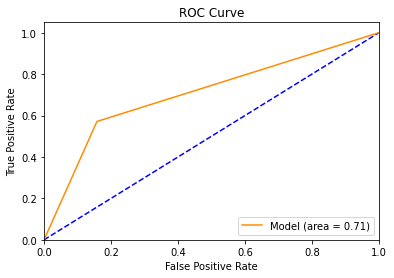

In [27]:
# ROC curve for decision tree model
roc_curve (dectree,X_test,y_test)

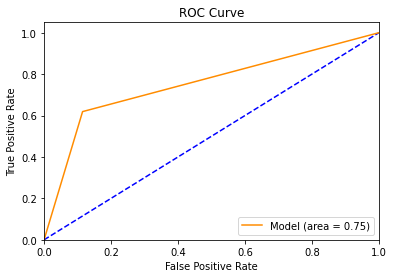

In [28]:
# ROC curve for random forest model
roc_curve (randomforest,X_test,y_test)

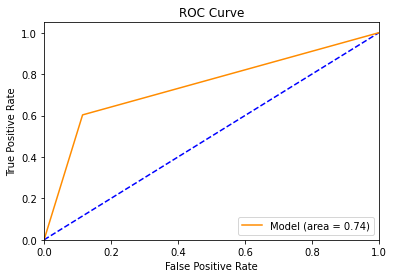

In [29]:
# ROC curve for adaboost model
roc_curve (adaboost,X_test,y_test)

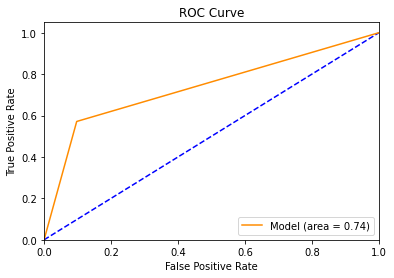

In [30]:
# ROC curve for gradient boost model
roc_curve (gradientboost,X_test,y_test)

In [31]:
# define a function for plotting the feature importances
def plot_feature_importances(model):
  feature_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)
  feature_importances = feature_importances.sort_values(axis=0, ascending=False)
  fig, ax = plt.subplots()
  feature_importances.plot.bar()
  ax.set_title("Feature importances")
  fig.tight_layout()

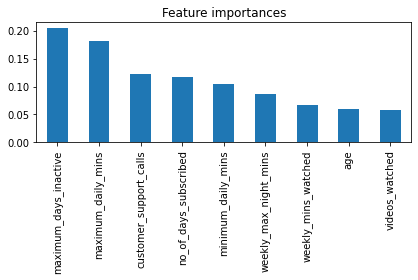

In [32]:
# feature importances for decision tree model
plot_feature_importances(dectree)

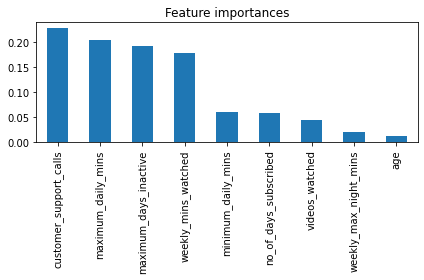

In [33]:
# feature importances for random forest model
plot_feature_importances(randomforest)

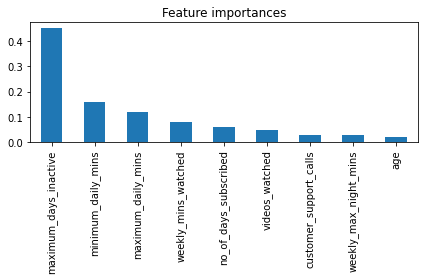

In [34]:
# feature importances for adaboost model
plot_feature_importances(adaboost)

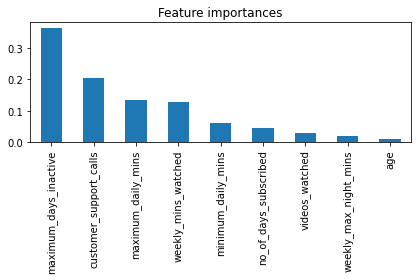

In [35]:
# feature importances for gradient boost model
plot_feature_importances(gradientboost)

# **LIME Implementation**

In [36]:
# define a function for lime - local interpretable model-agnostic explanations
def lime_explanation(model,X_train,X_test,class_names,chosen_index):
  import lime
  import lime.lime_tabular
  explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,feature_names = X_train.columns,class_names=class_names,kernel_width=5)
  choosen_instance = X_test.loc[[chosen_index]].values[0]
  exp = explainer.explain_instance(choosen_instance, lambda x: model.predict_proba(x).astype(float),num_features=10)
  exp.show_in_notebook(show_all=False)

In [37]:
# implement the lime function
lime_explanation(gradientboost,X_train,X_test,['Not Churn','Churn'],1)

In [38]:
# define a function for creating lime list
def lime_explanation_list(model,X_train,X_test,class_names,chosen_index):
  import lime
  import lime.lime_tabular
  explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,feature_names = X_train.columns,class_names=class_names,kernel_width=5)
  choosen_instance = X_test.loc[[chosen_index]].values[0]
  exp = explainer.explain_instance(choosen_instance, lambda x: model.predict_proba(x).astype(float),num_features=10)
  return exp.as_list()

In [39]:
# lime implementation results in form of a list
lime_explanation_list(gradientboost,X_train,X_test,['Not Churn','Churn'],1)

[('maximum_days_inactive <= 3.00', -0.08998526288858717),
 ('videos_watched <= 3.00', 0.05840109619908157),
 ('276.75 < weekly_mins_watched <= 347.59', -0.03921748971000845),
 ('minimum_daily_mins <= 8.68', -0.03520782076863923),
 ('no_of_days_subscribed > 123.00', -0.03346613206419277),
 ('31.37 < maximum_daily_mins <= 39.39', -0.026418173401934236),
 ('37.00 < age <= 43.00', -0.013506929626163877),
 ('weekly_max_night_mins <= 87.00', -0.004569454520135648),
 ('1.00 < customer_support_calls <= 3.00', -0.0011650230871986021)]